# Clase 8

Objetivos

* Repaso de sistemas de ecuaciones diferenciales ordinarias (ODE)
* Resolución de ODEs con scipy.

Hoy, el foco de la clase es la resolución de ecuaciones diferenciales (ODEs por su acrónimo en inglés) ordinarias en Python. 

Nota: Los siguientes dos ejemplos fueron extraidos desde [aquí](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations).

Ejercicio 1
-------------

Resolver el siguiente ODE:

$\frac{dy}{dt}=-ky$

con condición inicial $y_0=5$, y un valor de $k=0.3$.

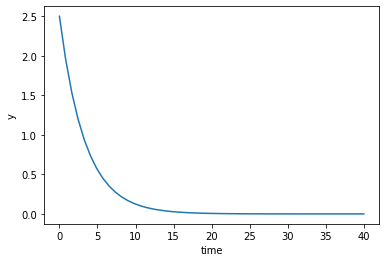

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 2.5

# time points
t = np.linspace(0,40)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y')
plt.show()

Ejercicio 2
-------------

Resolver el siguiente ODE anterior pero esta vez para valores de $k$ igual a 0.1, 0.2, y 0.5.

Ejercicio 3: Reactor por lotes
-----------

Veamos como resolver un sistema ODE. Por ejemplo, consideremos el siguiente sistema describiendo las concentraciones de biomasa ($X$) y glucosa ($G$):
    
<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase13_reactor.png" alt="Drawing" style="width: 500px;"/>    
    

    
El cual puede ser descrito matematicamente como:

\begin{align}
\frac{dX}{dt} &= \mu X\\
\frac{dG}{dt} &= -q_G \mu X
\end{align}

En donde $q_G$ es el consumo especifico de glucosa. Ten en cuenta que la velocidad de crecimiento especifica ($\mu$) varia con la concentración de glucosa con una cinética tipo Monod:

$\mu = \mu_M \frac{G}{K+G}$


Resuelve este sistema ODE considerando 70 horas de operación del reactor y con $\mu_M=0.15$, $K=0.1$, $q_G=1.1$, y condiciones iniciales $X_0=0.1$ y $G_0=20$.
   

Ejercicio 4: Aplicación en cinética enzimática
-------------

Veamos como resolver un sistema de ecuaciónes diferenciales ordinarias a través de un problema concreto: cinética enzimática

Una reacción enzimática puede ser modelada como:

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/clase10_enzyme_reaction.png" alt="Drawing" style="width: 400px;"/>

De manera mas formal: un substrato $S$ reacciona con una enzima $E$ para formar un complejo $ES$ que es convertido en producto $P$ y en enzima disociada:

\begin{equation}
E+S \overset{k_1}{ \underset{k_{2}}{\rightleftharpoons}} ES \stackrel{k_3}{\rightarrow} E + P
\end{equation}

La primera reacción es reversible con constantes cinéticas de unión y desunion del complejo ES iguales a $k_1$ y $k_2$, respectivamente. La segunda reacción es irreversible con constante cinética $k_3$. 

El comportamiento cinético de estas reacciones es descrito por el siguiente set de ecuaciones diferenciales:

\begin{align}
\frac{d[S]}{dt} &= -k_1[E][S]+ k_2[ES]\\
\frac{d[E]}{dt} &= -k_1[E][S]+ (k_{2}+k_3)[ES]\\
\frac{d[ES]}{dt} &= k_1[E][S]- (k_{2}+k_3)[ES]\\
\frac{d[P]}{dt} &= k_3[ES]\\
\end{align}

Con condiciones iniciales:

$[S]_{t=0}=1,[E]_{t=0}=2,[ES]_{t=0}=0,[P]_{t=0}=0$

y parametros:

$k_1=0.5$, $k_2=0.25$, y $k_3=0.25$



Resolver el sistema dinámico hasta un timpo final de 30 horas.

# Ejercicio 5: Reacciones metabólicas oscilantes


Consideremos un par de reacciones en donde la concentración de uno de los reactantes $A$ es mucho mayor que su valor de equilibrio. La reacción que consume $A$ es mucho mayor la reacción que lo produce. Además, consideremos dos metabolitos intermediarios $X$ e $Y$ que catalizan sus propias reacciones de consumo (forman reacciones autocataliticas):

\begin{align}
A + X \rightarrow 2X \\
X + Y \rightarrow 2Y \\
Y \rightarrow E
\end{align}

La variación en el tiempo de $X$ e $Y$ es descrita por el siguiente sistema ODE:

\begin{align}
\frac{dX}{dt} &= k_1 AX - k_2XY\\
\frac{dY}{dt} &= k_2XY - k_3Y
\end{align}

en donde $k_1$, $k_2$ y $k_3$ son constantes cinéticas. Este sistema da lugar a un comportamiento oscilatorio para $X$ e $Y$.

Considerando $A$, $k_1$, $k_2$, y $k_3$ constantes, resuelve el sistema ODE. Para tus cálculos tiene libre elección para asignar  valores a las constantes y condiciones iniciales.